# Acerca del conjunto de datos
Análisis integral de parámetros de elaboración, tendencias de ventas y métricas de calidad en la producción de cerveza artesanal (2020-2024)

# Descripción general:
Este conjunto de datos presenta una amplia recopilación de datos de una cervecería artesanal, que abarca desde enero de 2020 hasta enero de 2024. Encapsula una rica combinación de parámetros de elaboración, datos de ventas y evaluaciones de calidad, lo que proporciona una visión integral del proceso de elaboración y sus implicaciones en el mercado.

#Conjunto de datos de análisis de mercado y operaciones de cervecerías

FUENTE: https://www.kaggle.com/datasets/ankurnapa/brewery-operations-and-market-analysis-dataset/data

GOOGLE DRIVE CON ARCHIVO CSV: https://drive.google.com/drive/folders/1XVFzt3wSik2AJ6Zmhd2mBTgzWnaRKc5a?usp=sharing

NOTA: resulta oportuno mencionar que el archivo .csv pesa mas de 100 mb por tal motivo adjunto el link de google drive.

El objetivo principal de este proyecto es predecir el Quality_Score de los lotes de cerveza artesanal en base de los parámetros de elaboración y otras características. Esto permitirá a la cervecería identificar los factores clave que influyen en la calidad del producto y optimizar sus procesos de producción.



#1. Importar Bibliotecas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

#2. Cargar Datos

In [2]:
from google.colab import files
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
df= pd.read_csv("/content/drive/MyDrive/Data_Science_II/brewery_data_complete_extended.csv")
df.shape

(10000000, 20)

#3. Reducción de filas del Csv


Se realiza la reducción del csv a 25000 filas para poder realizar el proyecto con una muestra aleatoria, obteniendo así un nuevo DataFrame denominado "df_reducido"


In [4]:
df_reducido= df.sample(n=25000)
df_reducido.to_csv('df_reducido.csv',index= False)

Se puede verificar mediante df_reducido.shape que se realizo la reducción a 8000 filas

In [5]:
df_reducido.shape

(25000, 20)

#4. Inspección Inicial

In [6]:
print("Valores nulos")
df_reducido.isnull().sum()

Valores nulos


,0
Batch_ID,0
Brew_Date,0
Beer_Style,0
SKU,0
Location,0
Fermentation_Time,0
Temperature,0
pH_Level,0
Gravity,0
Alcohol_Content,0


La muestra no presenta valores nulos.

In [7]:
df_reducido.head()

,Batch_ID,Brew_Date,Beer_Style,SKU,Location,Fermentation_Time,Temperature,pH_Level,Gravity,Alcohol_Content,Bitterness,Color,Ingredient_Ratio,Volume_Produced,Total_Sales,Quality_Score,Brewhouse_Efficiency,Loss_During_Brewing,Loss_During_Fermentation,Loss_During_Bottling_Kegging
8947777,8556577,2023-07-31 08:32:38,Pilsner,Bottles,Yelahanka,16,20.078884,4.682239,1.057917,5.076741,24,10,1:0.47:0.25,4144,12830.350673,7.501420,82.319579,4.994446,4.828597,2.438636
8172861,7581130,2023-04-09 02:40:59,Ale,Kegs,Indiranagar,19,20.922941,5.000681,1.039935,5.285829,26,13,1:0.48:0.23,1317,9781.791794,7.357814,79.266342,2.826610,2.474831,3.350728
5341654,7921334,2022-02-19 10:39:32,Pilsner,Kegs,Yelahanka,12,18.389834,5.457881,1.044877,5.649140,49,5,1:0.36:0.11,4210,3395.091962,7.827690,74.407059,1.727411,4.438249,4.118438
6248092,438136,2022-07-01 17:33:42,Lager,Cans,Jayanagar,13,16.143605,5.471845,1.067915,5.730692,59,16,1:0.24:0.14,3766,11133.472804,6.622234,70.610152,4.323230,3.365893,4.278843
6113417,3807338,2022-06-12 04:45:30,Ale,Kegs,Marathahalli,19,21.407599,5.170833,1.051388,5.634317,48,8,1:0.48:0.27,3686,13055.436039,9.387142,87.016150,1.038481,2.753185,1.496436


In [8]:
print("Información de las variables")
df_reducido.info()

Información de las variables
<class 'pandas.core.frame.DataFrame'>
Index: 25000 entries, 8947777 to 3813222
Data columns (total 20 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Batch_ID                      25000 non-null  int64  
 1   Brew_Date                     25000 non-null  object 
 2   Beer_Style                    25000 non-null  object 
 3   SKU                           25000 non-null  object 
 4   Location                      25000 non-null  object 
 5   Fermentation_Time             25000 non-null  int64  
 6   Temperature                   25000 non-null  float64
 7   pH_Level                      25000 non-null  float64
 8   Gravity                       25000 non-null  float64
 9   Alcohol_Content               25000 non-null  float64
 10  Bitterness                    25000 non-null  int64  
 11  Color                         25000 non-null  int64  
 12  Ingredient_Ratio            

In [9]:
print("Aproximación estadística")
df_reducido.describe().T.round(2)

Aproximación estadística


,count,mean,std,min,25%,50%,75%,max
Batch_ID,25000.0,5005586.63,2886486.30,359.00,2518192.00,5031141.00,7496099.50,9999985.00
Fermentation_Time,25000.0,14.50,2.86,10.00,12.00,14.00,17.00,19.00
Temperature,25000.0,19.99,2.89,15.00,17.50,20.00,22.50,25.00
pH_Level,25000.0,5.00,0.29,4.50,4.75,5.00,5.25,5.50
Gravity,25000.0,1.05,0.01,1.03,1.04,1.05,1.07,1.08
Alcohol_Content,25000.0,5.25,0.43,4.50,4.87,5.25,5.62,6.00
Bitterness,25000.0,39.44,11.58,20.00,29.00,39.00,50.00,59.00
Color,25000.0,11.96,4.32,5.00,8.00,12.00,16.00,19.00
Volume_Produced,25000.0,2744.15,1298.38,500.00,1626.00,2739.00,3873.25,4999.00
Total_Sales,25000.0,10507.51,5485.77,1000.03,5769.17,10561.84,15274.74,19999.75


In [10]:
print("Variables numéricas")
df_numerico= df_reducido.select_dtypes(include='number').iloc[:,1:]
df_numerico.head()

Variables numéricas


,Fermentation_Time,Temperature,pH_Level,Gravity,Alcohol_Content,Bitterness,Color,Volume_Produced,Total_Sales,Quality_Score,Brewhouse_Efficiency,Loss_During_Brewing,Loss_During_Fermentation,Loss_During_Bottling_Kegging
8947777,16,20.078884,4.682239,1.057917,5.076741,24,10,4144,12830.350673,7.501420,82.319579,4.994446,4.828597,2.438636
8172861,19,20.922941,5.000681,1.039935,5.285829,26,13,1317,9781.791794,7.357814,79.266342,2.826610,2.474831,3.350728
5341654,12,18.389834,5.457881,1.044877,5.649140,49,5,4210,3395.091962,7.827690,74.407059,1.727411,4.438249,4.118438
6248092,13,16.143605,5.471845,1.067915,5.730692,59,16,3766,11133.472804,6.622234,70.610152,4.323230,3.365893,4.278843
6113417,19,21.407599,5.170833,1.051388,5.634317,48,8,3686,13055.436039,9.387142,87.016150,1.038481,2.753185,1.496436


In [11]:
print("matriz de correlación")
matriz_corr_df= df_numerico.corr()
matriz_corr_df.round(3)

matriz de correlación


,Fermentation_Time,Temperature,pH_Level,Gravity,Alcohol_Content,Bitterness,Color,Volume_Produced,Total_Sales,Quality_Score,Brewhouse_Efficiency,Loss_During_Brewing,Loss_During_Fermentation,Loss_During_Bottling_Kegging
Fermentation_Time,1.000,-0.004,0.000,-0.003,-0.001,-0.008,0.003,-0.000,-0.002,0.005,-0.006,-0.001,0.009,0.002
Temperature,-0.004,1.000,-0.005,-0.004,0.007,-0.001,0.003,0.002,-0.000,0.004,-0.006,0.015,0.004,0.002
pH_Level,0.000,-0.005,1.000,-0.004,-0.000,0.010,-0.006,0.002,0.003,0.005,0.007,0.003,0.008,-0.001
Gravity,-0.003,-0.004,-0.004,1.000,-0.014,-0.003,0.002,0.003,0.002,-0.007,0.004,-0.003,0.010,-0.006
Alcohol_Content,-0.001,0.007,-0.000,-0.014,1.000,-0.003,-0.009,-0.001,0.011,0.007,-0.005,0.002,0.007,0.006
Bitterness,-0.008,-0.001,0.010,-0.003,-0.003,1.000,-0.009,0.002,-0.001,0.005,-0.003,-0.002,-0.000,0.011
Color,0.003,0.003,-0.006,0.002,-0.009,-0.009,1.000,-0.002,0.006,-0.007,0.005,-0.012,-0.005,-0.003
Volume_Produced,-0.000,0.002,0.002,0.003,-0.001,0.002,-0.002,1.000,-0.002,-0.009,-0.000,-0.011,-0.000,0.002
Total_Sales,-0.002,-0.000,0.003,0.002,0.011,-0.001,0.006,-0.002,1.000,0.002,-0.001,0.008,0.007,0.003
Quality_Score,0.005,0.004,0.005,-0.007,0.007,0.005,-0.007,-0.009,0.002,1.000,-0.004,0.004,-0.001,-0.004


Heatmap - Matriz de correlación


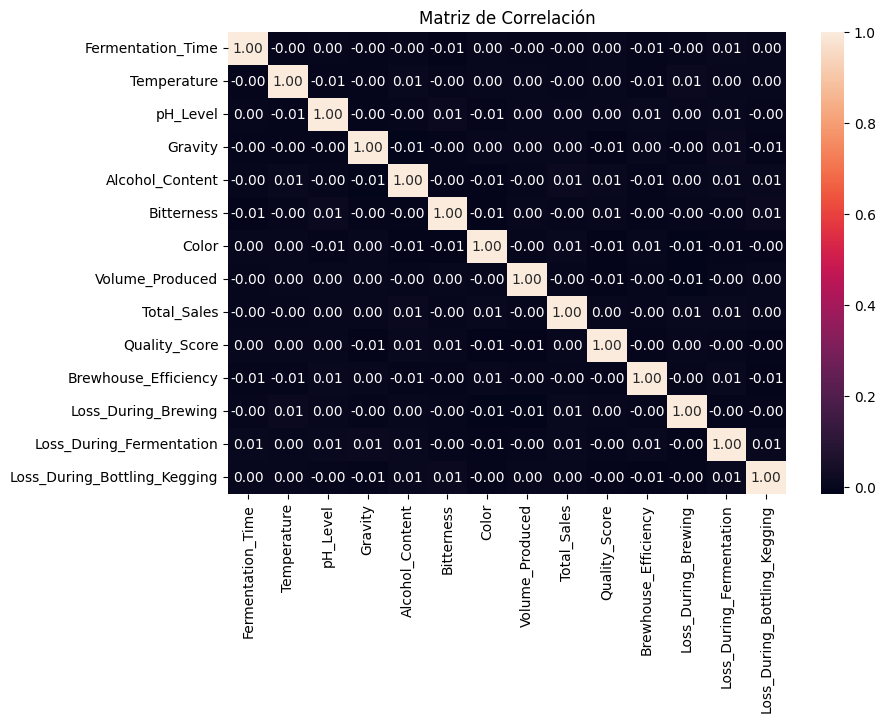

In [12]:
print("Heatmap - Matriz de correlación")
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(matriz_corr_df, annot=True, fmt=".2f",ax=ax )
plt.title("Matriz de Correlación")
plt.show()

La matriz muestra correlaciones muy bajas entre variables, ninguna variable tiene una relación lineal fuerte

In [13]:
df_reducido[['Ingrediente_1','Ingrediente_2','Ingrediente_3']] = df_reducido['Ingredient_Ratio'].str.split(':', expand=True)

In [14]:
df_reducido[['Ingrediente_1', 'Ingrediente_2', 'Ingrediente_3']] = df_reducido[['Ingrediente_1', 'Ingrediente_2', 'Ingrediente_3']].astype(float)

In [15]:
#Convertir Brew_date a datetime
df_reducido['Brew_Date'] = pd.to_datetime(df_reducido['Brew_Date'])

In [16]:
#Crear columnas de tiempo
df_reducido['Year'] = df_reducido['Brew_Date'].dt.year
df_reducido['Month'] = df_reducido['Brew_Date'].dt.month
df_reducido['Day'] = df_reducido['Brew_Date'].dt.day

In [17]:
df_reducido['Ingrediente_1'] = pd.to_numeric(df_reducido['Ingrediente_1'], errors='coerce')
df_reducido['Ingrediente_2'] = pd.to_numeric(df_reducido['Ingrediente_2'], errors='coerce')
df_reducido['Ingrediente_3'] = pd.to_numeric(df_reducido['Ingrediente_3'], errors='coerce')

In [18]:
for col in ['Ingrediente_1', 'Ingrediente_2', 'Ingrediente_3']:
    if df_reducido[col].isnull().any():
        df_reducido[col].fillna(df_reducido[col].median(), inplace=True)

Distribución de variables numéricas


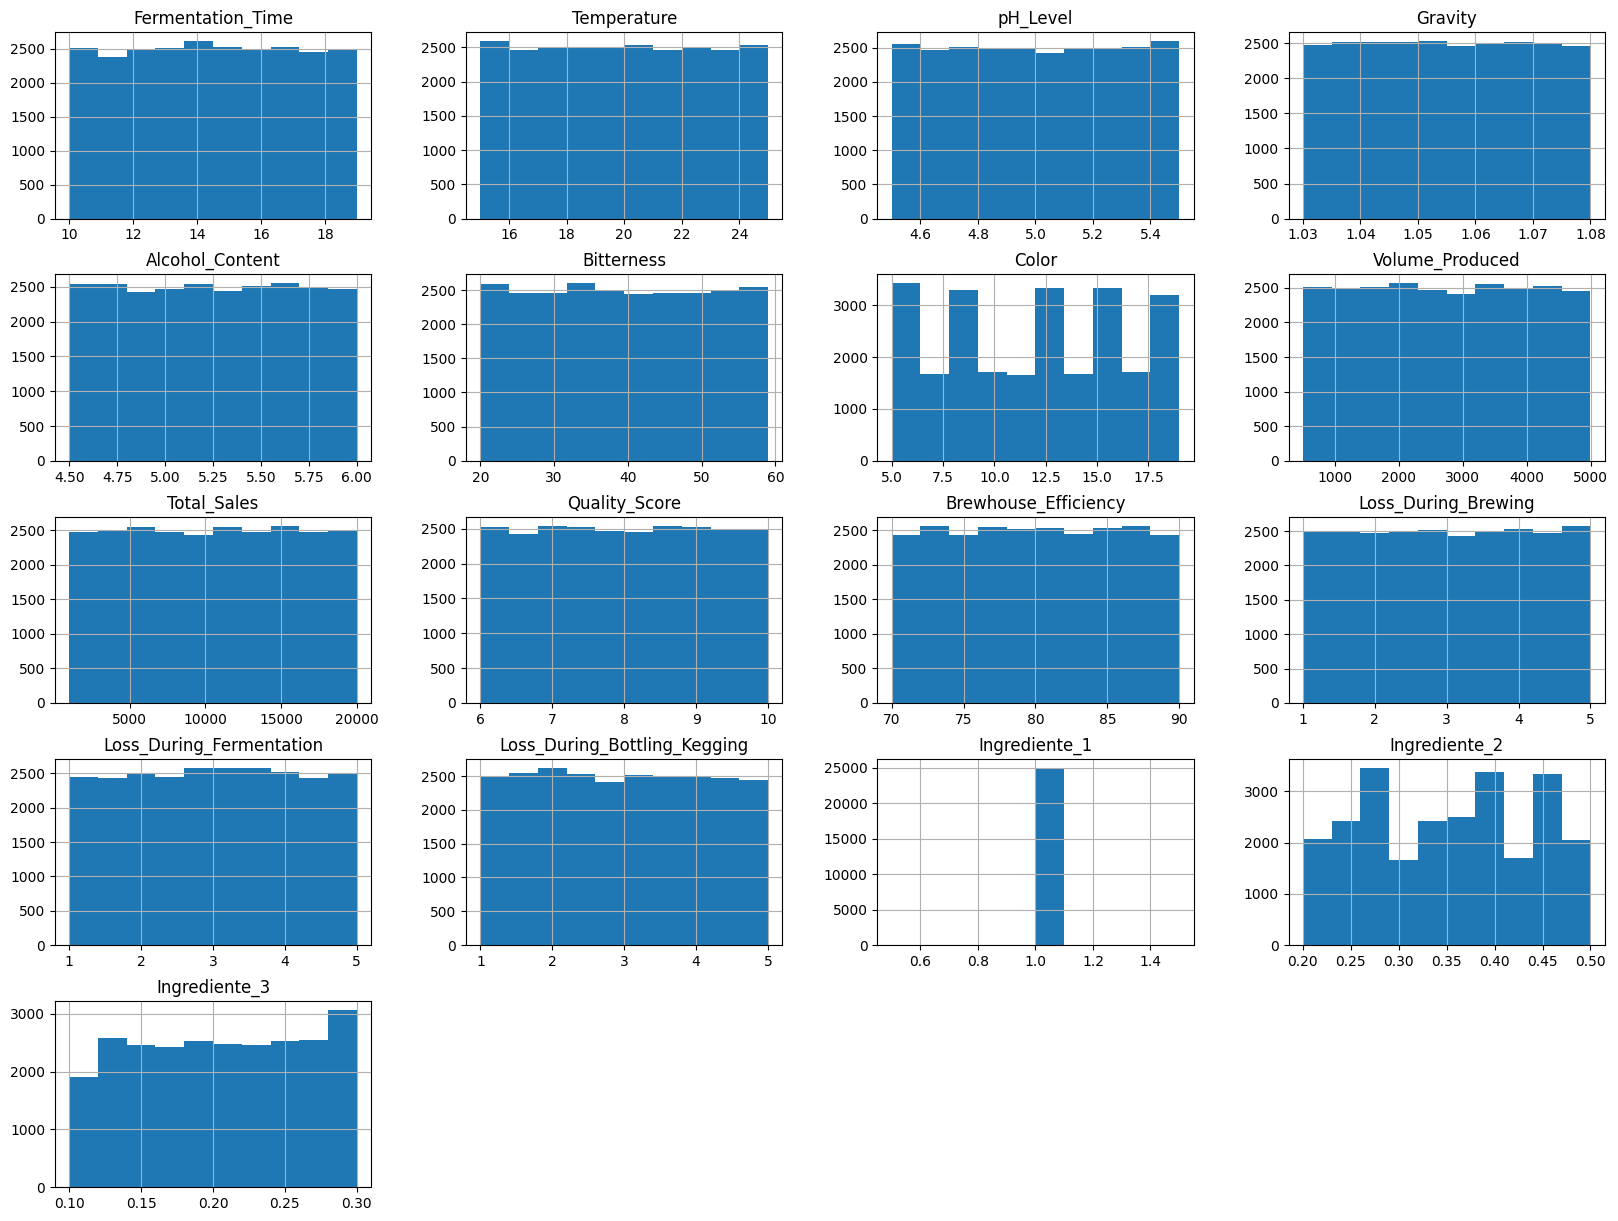

In [19]:
print("Distribución de variables numéricas")
df_reducido[['Fermentation_Time',
    'Temperature',
    'pH_Level',
    'Gravity',
    'Alcohol_Content',
    'Bitterness',
    'Color',
    'Volume_Produced',
    'Total_Sales',
    'Quality_Score',
    'Brewhouse_Efficiency',
    'Loss_During_Brewing',
    'Loss_During_Fermentation',
    'Loss_During_Bottling_Kegging',
             'Ingrediente_1',
             'Ingrediente_2',
             'Ingrediente_3']
   ].hist(figsize=(20, 15))
plt.show()

En el histograma se puede observar lo siguiente:

-Fermentation_Time, Temperature, Gravity, pH_Level, Alcohol_Content, Bitterness, Brewhouse_Efficiency:

Poseen una distribución uniforme. No hay grandes concentraciones en un solo rango.

-Color:

Muestra picos claros en ciertos valores

-Volume_Produced y Total_Sales:

Distribuciones similares, normales y balanceadas.
correlación entre volumen producido y ventas.

-Quality_Score:

Distribución bastante balanceada, concentrada entre 6 y 10.
No hay sesgo fuerte ni outliers evidentes.

-Loss_During_Brewing, Loss_During_Fermentation, Loss_During_Bottling_Kegging:

Distribuciones planas, sin picos definidos.


Distribución de variables categóricas


<Axes: xlabel='Location'>

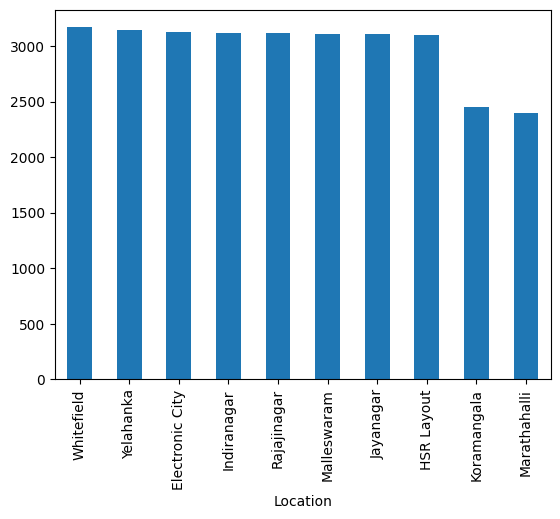

In [20]:
print("Distribución de variables categóricas")
df_reducido['Beer_Style'].value_counts().plot(kind='bar')
df_reducido['Location'].value_counts().plot(kind='bar')

La información del dataset es equilibrada para todas las locaciones, al utilizar una muestra se puede observar que hay dos locaciones que presentan menos muestras.

Relaciones entre variables


<Axes: xlabel='Beer_Style', ylabel='Quality_Score'>

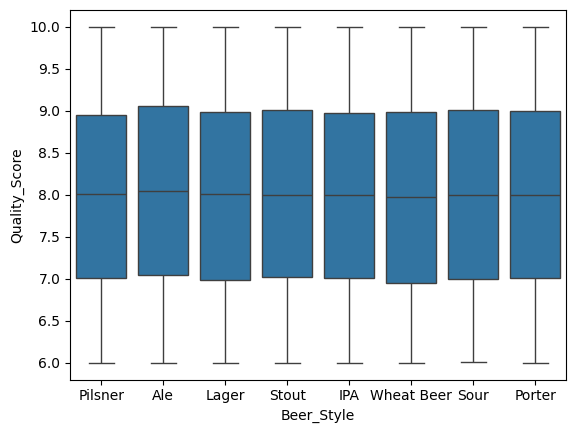

In [21]:
print("Relaciones entre variables")
sns.boxplot(x='Beer_Style', y='Quality_Score', data=df_reducido)
#sns.boxplot(x='Beer_Style', y='Total_Sales', data=df_reducido)

No se observa outliers, presentan valores equitativos entre variables.

Relaciones entre variables


<Axes: xlabel='Beer_Style', ylabel='Total_Sales'>

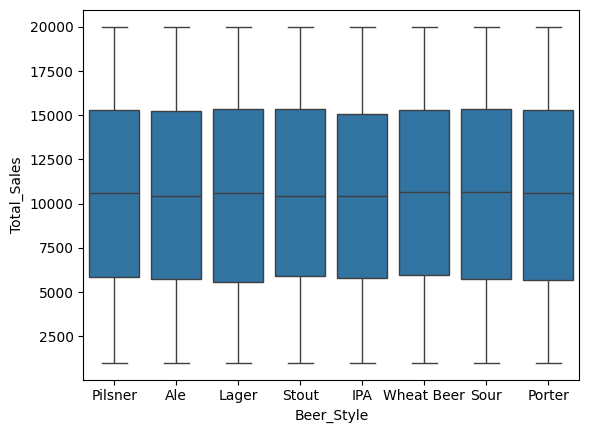

In [22]:
print("Relaciones entre variables")
sns.boxplot(x='Beer_Style', y='Total_Sales', data=df_reducido)

Ventas y producción


<Axes: xlabel='Year,Month'>

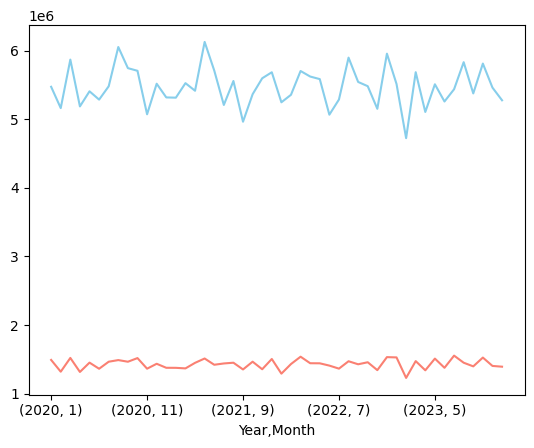

In [23]:
print("Ventas y producción")
df_reducido.groupby(['Year', 'Month'])['Total_Sales'].sum().plot(label='Ventas Totales', color='skyblue')
df_reducido.groupby(['Year', 'Month'])['Volume_Produced'].sum().plot(label='Volumen Producido', color='salmon')

Presentan una curva similar entre Total_Sales y Volume_Produced indicando una

 sincronización entre las ventas y la producción.

In [24]:
ventas_estilo_ubicacion = df_reducido.groupby(['Beer_Style', 'Location'])['Total_Sales'].agg(['sum', 'mean'])

In [25]:
print("Ventas por estilo y ubicación")
ventas_estilo_ubicacion = df_reducido.groupby(['Beer_Style', 'Location'])['Total_Sales'].sum().round(2)
print(ventas_estilo_ubicacion)

Ventas por estilo y ubicación
Beer_Style  Location       
Ale         Electronic City    3266757.86
            HSR Layout         3663897.93
            Indiranagar        3399436.20
            Jayanagar          3129268.58
            Koramangala        3086993.42
                                  ...    
Wheat Beer  Malleswaram        3616467.65
            Marathahalli       2968300.33
            Rajajinagar        3130953.88
            Whitefield         3164704.71
            Yelahanka          3392331.38
Name: Total_Sales, Length: 80, dtype: float64


Promedio de ventas mensuales a lo largo del tiempo


<Axes: xlabel='Year,Month'>

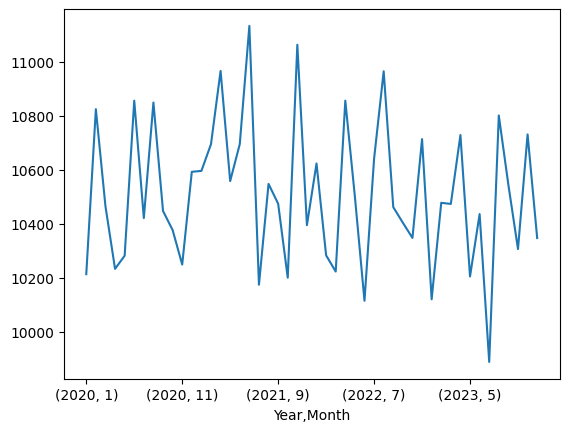

In [26]:
print("Promedio de ventas mensuales a lo largo del tiempo")
ventas_mes = df_reducido.groupby(['Year', 'Month'])['Total_Sales'].mean()
ventas_mes.plot()

Las ventas mensuales presentan estabilidad general, con una ligera volatilidad estacional.

In [27]:
print("Ventas por SKU")
Ventas_SKU = df_reducido.groupby(['SKU'])['Total_Sales'].sum().round(2)
print(Ventas_SKU)

Ventas por SKU
SKU
Bottles    65559286.95
Cans       64285369.04
Kegs       66317965.07
Pints      66525173.24
Name: Total_Sales, dtype: float64


Ventas por SKU


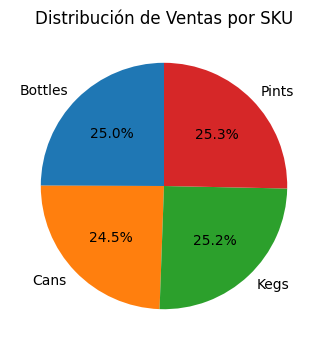

In [28]:
print("Ventas por SKU")
Ventas_SKU = df_reducido.groupby(['SKU'])['Total_Sales'].sum()
plt.figure(figsize=(4, 4))
plt.pie(Ventas_SKU, labels=Ventas_SKU.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribución de Ventas por SKU')

plt.show()

Se puede observar el que dataset es sintetico teniendo datos equitativos
.

In [29]:
eficiencia_por_ubicacion = df_reducido.groupby('Location')['Brewhouse_Efficiency'].mean()
print(eficiencia_por_ubicacion)

Location
Electronic City    79.994885
HSR Layout         80.005645
Indiranagar        80.134104
Jayanagar          80.024274
Koramangala        79.978101
Malleswaram        79.810873
Marathahalli       80.050499
Rajajinagar        80.297440
Whitefield         80.047214
Yelahanka          79.776445
Name: Brewhouse_Efficiency, dtype: float64


La eficiencia por localizacion esta equilibrada

Pérdidas por etapas


<Axes: >

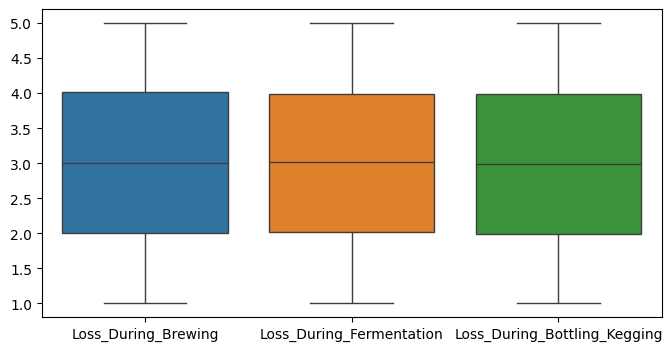

In [30]:
print("Pérdidas por etapas")
plt.figure(figsize=(8, 4))
sns.boxplot(data=df_reducido[['Loss_During_Brewing', 'Loss_During_Fermentation', 'Loss_During_Bottling_Kegging']])

Al ser un dataset sintetico, presenta una optima y equitativa perdida por eficiencia.

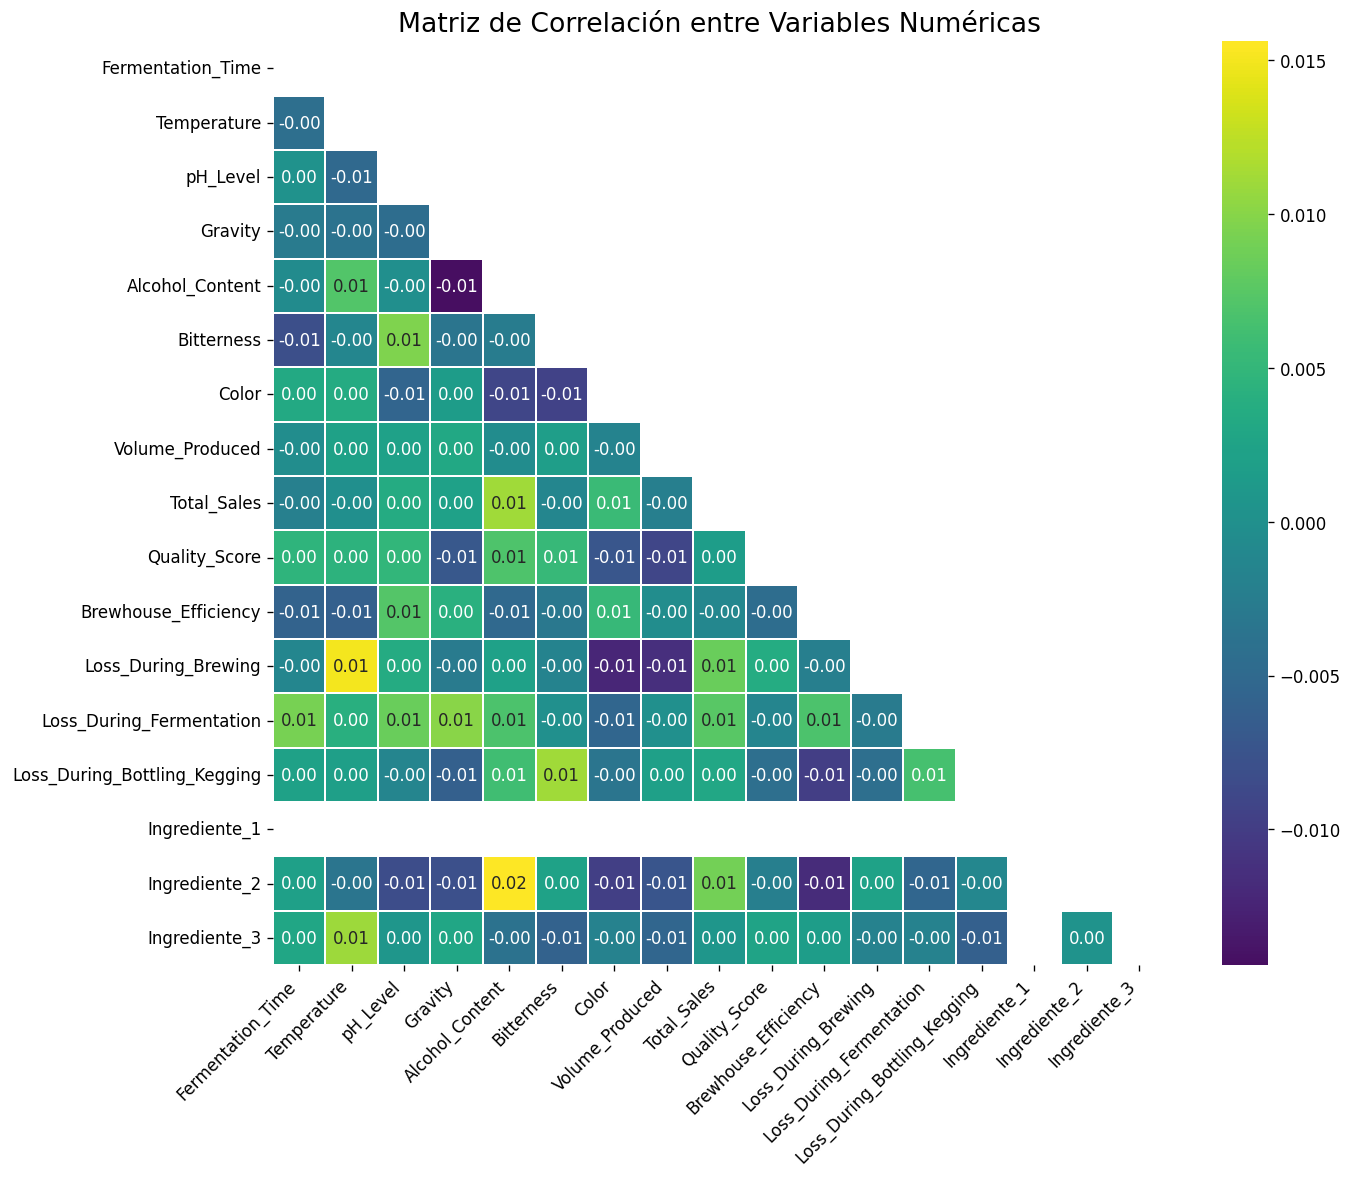

In [31]:
numeric_cols = ['Fermentation_Time', 'Temperature', 'pH_Level', 'Gravity', 'Alcohol_Content',
                'Bitterness', 'Color', 'Volume_Produced', 'Total_Sales', 'Quality_Score',
                'Brewhouse_Efficiency', 'Loss_During_Brewing', 'Loss_During_Fermentation',
                'Loss_During_Bottling_Kegging', 'Ingrediente_1', 'Ingrediente_2',
                'Ingrediente_3']

df_numerico = df_reducido[numeric_cols]

correlation_matrix = df_numerico.corr()

mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

plt.figure(dpi=120, figsize=(12, 10))

sns.heatmap(correlation_matrix,
            mask=mask,
            fmt=".2f",
            annot=True,
            lw=1,
            cmap='viridis',
            center=0)

plt.yticks(rotation=0)
plt.xticks(rotation=45, ha='right')
plt.title('Matriz de Correlación entre Variables Numéricas', fontsize=16)

plt.show()

#Modelos de Regresión

Regresión Lineal Múltiple

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Seleccionar variables predictoras y variable objetivo
X = df_reducido[['Alcohol_Content', 'Bitterness', 'Color', 'Fermentation_Time', 'Temperature']]
y = df_reducido['Quality_Score']

# Dividir datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenar modelo de regresión lineal múltiple
modelo = LinearRegression()
modelo.fit(X_train, y_train)

# Predecir valores de prueba
y_pred = modelo.predict(X_test)

# Evaluar modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'MSE: {mse:.2f}')
print(f'R2: {r2:.2f}')

MSE: 1.34
R2: -0.00


optimizacion del modelo de regresion lineal multiple

In [36]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.model_selection import cross_val_score

# Seleccionar características
selector = SelectKBest(f_regression, k=5)
X_seleccionado = selector.fit_transform(X, y)

# Entrenar modelo con regularización
from sklearn.linear_model import Ridge
modelo = Ridge(alpha=1.0)
modelo.fit(X_seleccionado, y)

# Evaluar modelo con validación cruzada
scores = cross_val_score(modelo, X_seleccionado, y, cv=5)
print(scores)

[-0.00177948 -0.00010945 -0.00112097 -0.000781   -0.00060384]


Random Forest Regressor

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Seleccionar variables predictoras y variable objetivo
X = df_reducido[['Alcohol_Content', 'Bitterness', 'Color', 'Fermentation_Time', 'Temperature']]
y = df_reducido['Quality_Score']

# Dividir datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenar modelo de Random Forest Regressor
modelo = RandomForestRegressor(n_estimators=100, random_state=42)
modelo.fit(X_train, y_train)

# Predecir valores de prueba
y_pred = modelo.predict(X_test)

# Evaluar modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'MSE: {mse:.2f}')
print(f'R2: {r2:.2f}')

MSE: 1.42
R2: -0.06


optimización random forest regressor

In [38]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

# Definir espacio de búsqueda de hiperparámetros
param_grid = {
    'n_estimators': [10, 50, 100, 200],
    'max_depth': [None, 5, 10, 15]
}

# Realizar búsqueda en cuadrícula
grid_search = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=5)
grid_search.fit(X, y)

# Obtener mejores hiperparámetros
mejores_hiperparametros = grid_search.best_params_
print(mejores_hiperparametros)

{'max_depth': 5, 'n_estimators': 200}


Gradient Boosting Regressor

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Seleccionar variables predictoras y variable objetivo
X = df_reducido[['Alcohol_Content', 'Bitterness', 'Color', 'Fermentation_Time', 'Temperature']]
y = df_reducido['Quality_Score']

# Dividir datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenar modelo de Gradient Boosting Regressor
modelo = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
modelo.fit(X_train, y_train)

# Predecir valores de prueba
y_pred = modelo.predict(X_test)

# Evaluar modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'MSE: {mse:.2f}')
print(f'R2: {r2:.2f}')

MSE: 1.34
R2: -0.01


optimizacion de gradient boosting regressor

In [40]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV

# Definir espacio de búsqueda de hiperparámetros
param_grid = {
    'n_estimators': [10, 50, 100, 200],
    'learning_rate': [0.1, 0.05, 0.01]
}

# Realizar búsqueda en cuadrícula
grid_search = GridSearchCV(GradientBoostingRegressor(random_state=42), param_grid, cv=5)
grid_search.fit(X, y)

# Obtener mejores hiperparámetros
mejores_hiperparametros = grid_search.best_params_
print(mejores_hiperparametros)

{'learning_rate': 0.01, 'n_estimators': 10}


In [41]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenar los modelos
modelo_rlm = LinearRegression()
modelo_rlm.fit(X_train, y_train)

modelo_rfr = RandomForestRegressor(max_depth=5, n_estimators=200)
modelo_rfr.fit(X_train, y_train)

modelo_gbr = GradientBoostingRegressor(learning_rate=0.01, n_estimators=10)
modelo_gbr.fit(X_train, y_train)

# Evaluar los modelos
y_pred_rlm = modelo_rlm.predict(X_test)
y_pred_rfr = modelo_rfr.predict(X_test)
y_pred_gbr = modelo_gbr.predict(X_test)

mse_rlm = mean_squared_error(y_test, y_pred_rlm)
mse_rfr = mean_squared_error(y_test, y_pred_rfr)
mse_gbr = mean_squared_error(y_test, y_pred_gbr)

r2_rlm = r2_score(y_test, y_pred_rlm)
r2_rfr = r2_score(y_test, y_pred_rfr)
r2_gbr = r2_score(y_test, y_pred_gbr)

print("MSE:")
print(f"RLM: {mse_rlm:.2f}")
print(f"RFR: {mse_rfr:.2f}")
print(f"GBR: {mse_gbr:.2f}")

print("R2:")
print(f"RLM: {r2_rlm:.2f}")
print(f"RFR: {r2_rfr:.2f}")
print(f"GBR: {r2_gbr:.2f}")

MSE:
RLM: 1.34
RFR: 1.34
GBR: 1.34
R2:
RLM: -0.00
RFR: -0.00
GBR: -0.00


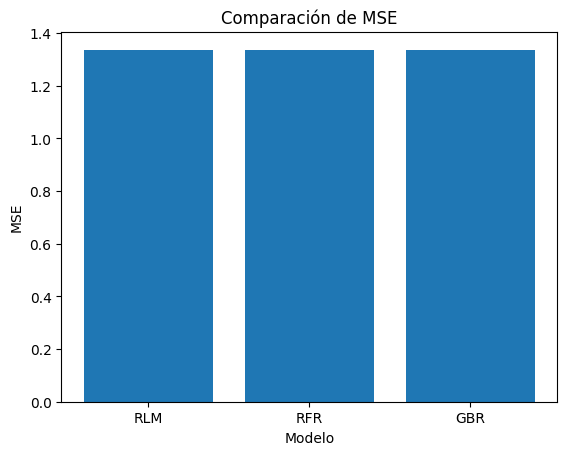

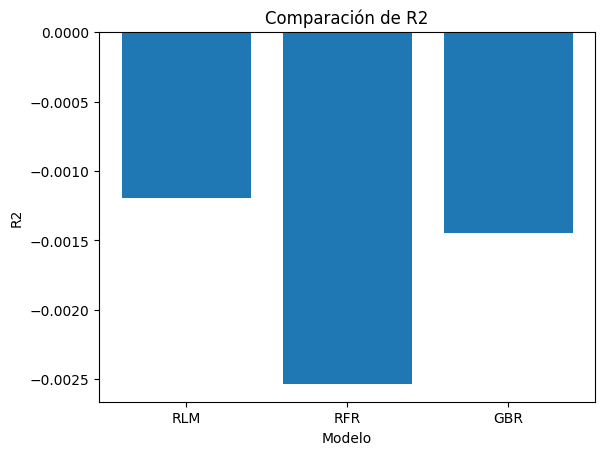

In [42]:
import matplotlib.pyplot as plt

plt.bar(["RLM", "RFR", "GBR"], [mse_rlm, mse_rfr, mse_gbr])
plt.xlabel("Modelo")
plt.ylabel("MSE")
plt.title("Comparación de MSE")
plt.show()

plt.bar(["RLM", "RFR", "GBR"], [r2_rlm, r2_rfr, r2_gbr])
plt.xlabel("Modelo")
plt.ylabel("R2")
plt.title("Comparación de R2")
plt.show()